# Problem 1: Clustering

 A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.
 
## 1.1 Read the data and do exploratory data analysis. Describe the data briefly.

In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster

In [2]:
# importing the Dataset

data_df=pd.read_csv('bank_marketing_part1_Data.csv')
data_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [3]:
data_df.shape

(210, 7)

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [6]:
data_df.isna().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

1.1 Read the data and do exploratory data analysis. Describe the data briefly.

## Univariate analysis

Checking the outliers in the dataset using the boxplot and checking the normality of the data using histogram

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_w

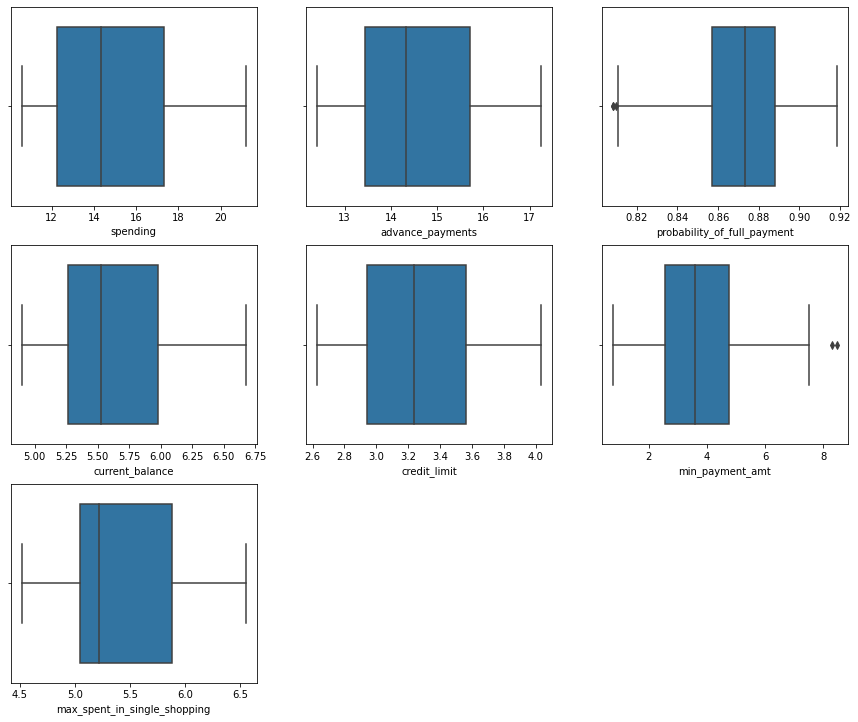

In [7]:
#  SUBPLOTS - FOR Loop
rowCnt = len(data_df.columns)
colCnt = 3
subCnt = 1

fig = plt.figure(figsize=(15,30))

for i in data_df.columns:
    plt.subplot(rowCnt, colCnt, subCnt)
    plt.xlabel(i, fontsize=10)
    sns.boxplot(data_df[i],orient='v')
    subCnt = subCnt + 1

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

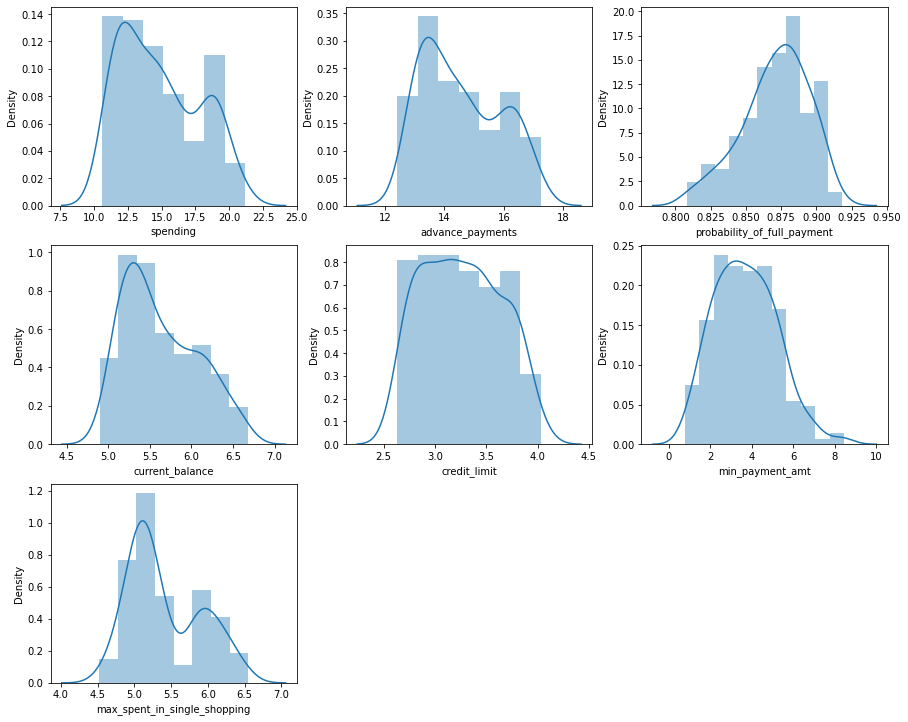

In [8]:
#  SUBPLOTS - FOR Loop
rowCnt = len(data_df.columns)
colCnt = 3
subCnt = 1

fig = plt.figure(figsize=(15,30))
for j in data_df.columns:
    plt.subplot(rowCnt, colCnt, subCnt)
    plt.xlabel(j, fontsize=10)
    sns.distplot(data_df[j])
    subCnt = subCnt + 1

## Multivariate analysis

Checking the correlation using the pairplot and heatmap

(7.5, -0.5)

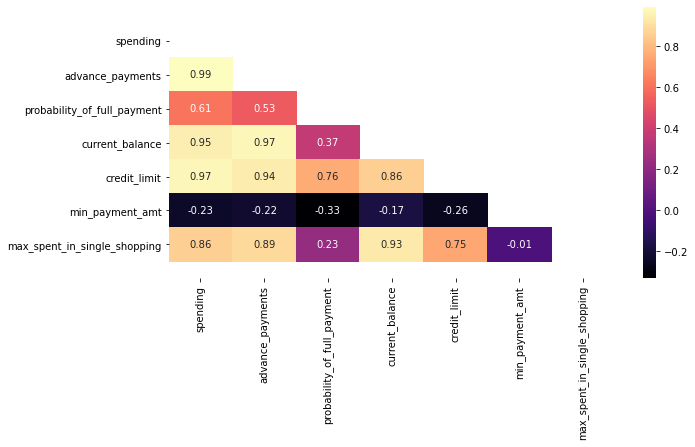

In [9]:
corr=data_df.corr(method='pearson')

# plot the correlation coefficients as a heatmap

plt.subplots(figsize=(10,5))
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
ax=sns.heatmap(data_df.corr(), annot=True,fmt='.2f',cmap='magma',mask=mask)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

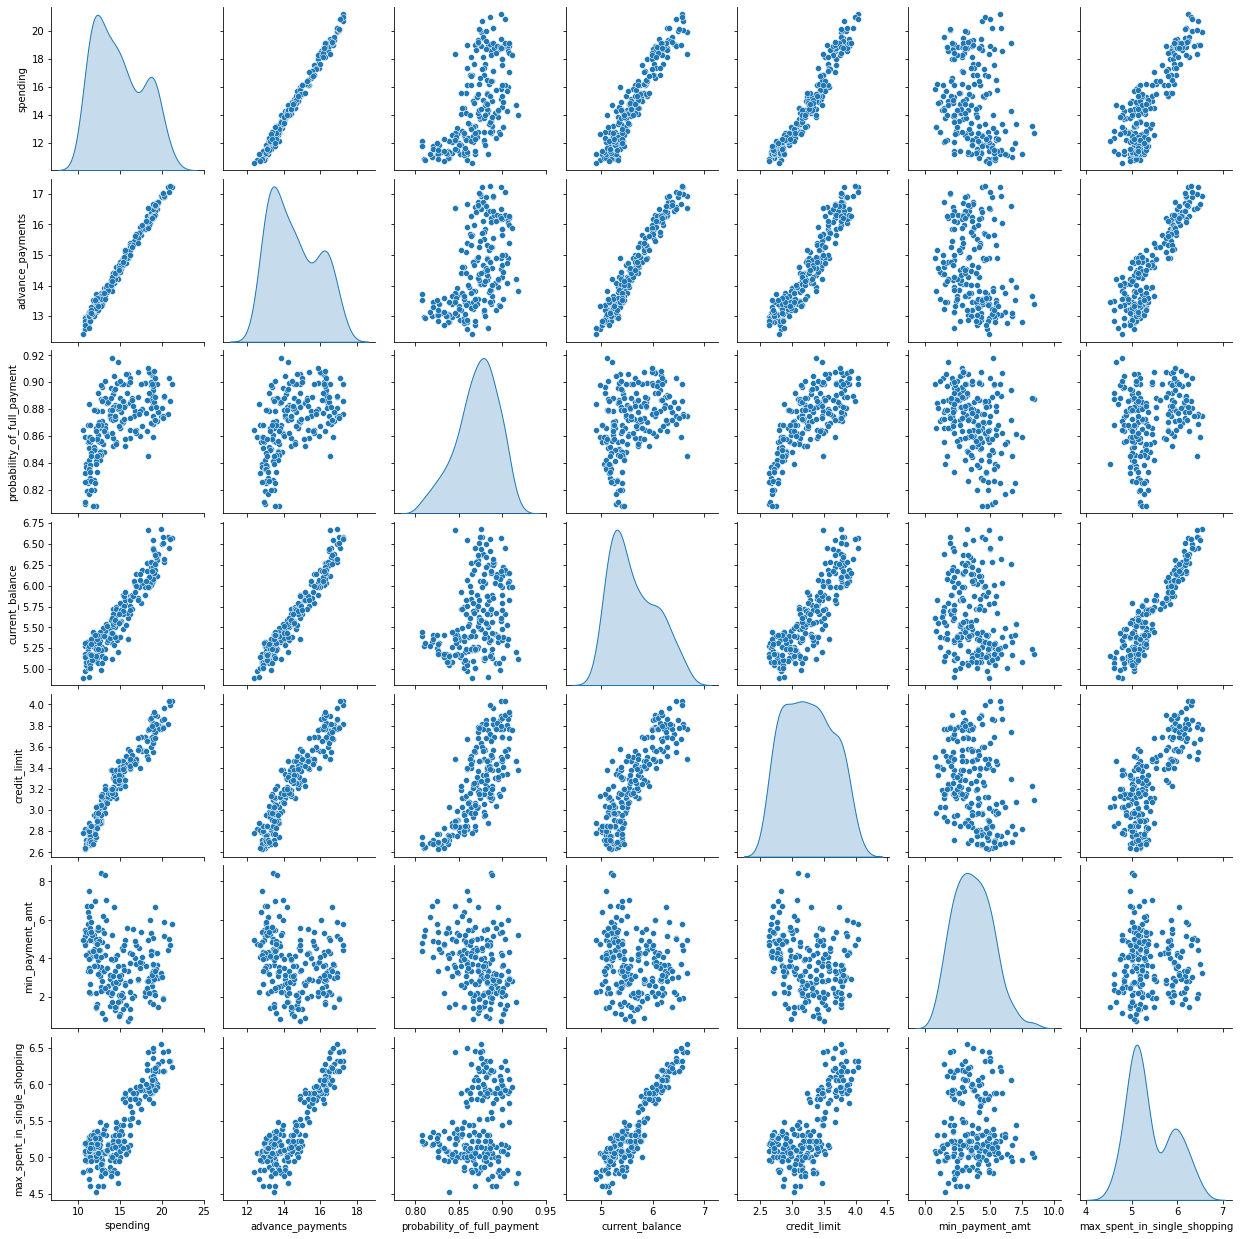

In [10]:
#Let us check for pair plots
sns.pairplot(data_df,diag_kind='kde')
plt.show()

In [11]:
data_df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'],
      dtype='object')

In [12]:
data_df[['probability_of_full_payment','min_payment_amt']]

,probability_of_full_payment,min_payment_amt
0,0.8752,3.252
1,0.9064,3.336
2,0.8829,3.368
3,0.8099,5.182
4,0.8992,2.068
...,...,...
205,0.8880,3.986
206,0.8638,4.920
207,0.8796,1.717
208,0.9000,2.270


In [13]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range


cols=data_df[['probability_of_full_payment','min_payment_amt']]

for col in cols:
    low,upp=remove_outlier(data_df[col])
    data_df[col]=np.where(data_df[col]<low,low,data_df[col])
    data_df[col]=np.where(data_df[col]>upp,upp,data_df[col])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_w

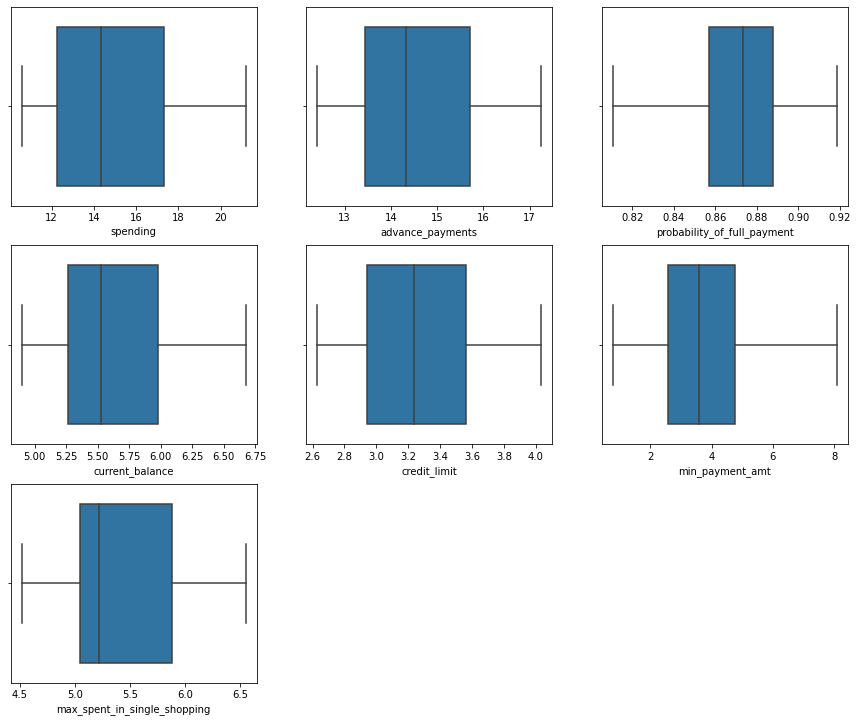

In [14]:
#  SUBPLOTS - FOR Loop
rowCnt = len(data_df.columns)
colCnt = 3
subCnt = 1

fig = plt.figure(figsize=(15,30))

for i in data_df.columns:
    plt.subplot(rowCnt, colCnt, subCnt)
    plt.xlabel(i, fontsize=10)
    sns.boxplot(data_df[i],orient='v')
    subCnt = subCnt + 1

## 1.2 Do you think scaling is necessary for clustering in this case? Justify

In [15]:
# Scaling the dataset

sc=StandardScaler()
dfs=sc.fit_transform(data_df)
dfs

array([[ 1.75435461,  1.81196782,  0.177628  , ...,  1.33857863,
        -0.29862524,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.50507052, ...,  0.85823561,
        -0.24229198, -0.53858174],
       [ 1.41330028,  1.42819249,  0.505234  , ...,  1.317348  ,
        -0.22083168,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36483143, ..., -0.15287318,
        -1.32804867, -0.83023461],
       [ 0.43836719,  0.33827054,  1.23277462, ...,  0.60081421,
        -0.95718798,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77966228, ..., -0.07325831,
        -0.70905334,  0.96047321]])

In [16]:
# scaling the data using z score

from scipy.stats import zscore

scale=data_df.apply(zscore)
scale.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


Text(0.5, 1.0, 'Before scaling')

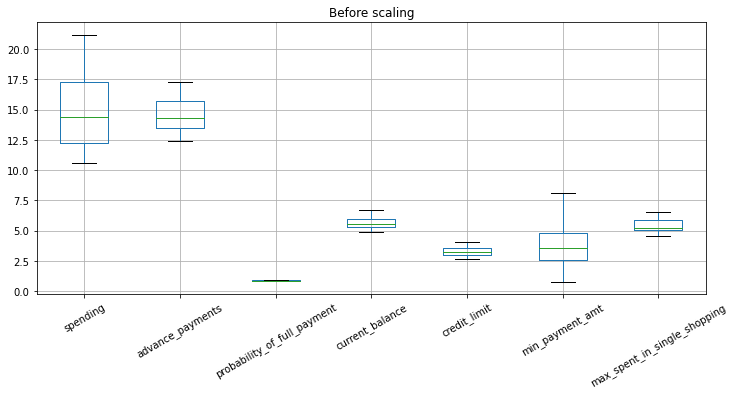

In [17]:
data_df.boxplot(figsize=(12,5))
plt.xticks(rotation=30)
plt.title('Before scaling')

Text(0.5, 1.0, 'After scaling')

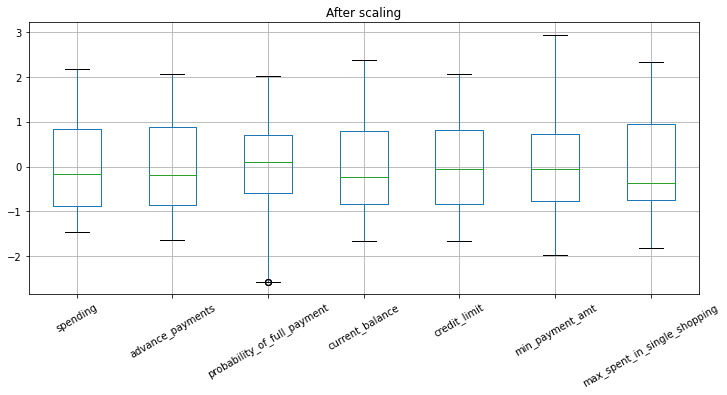

In [18]:
scale.boxplot(figsize=(12,5))
plt.xticks(rotation=30)
plt.title('After scaling')

## 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

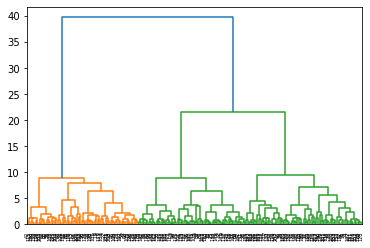

In [19]:
# creating linkage

ward_link=linkage(dfs,method='ward')

dend=dendrogram(ward_link)

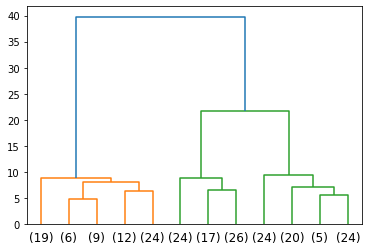

In [20]:
dend = dendrogram(ward_link,
                 truncate_mode='lastp',
                 p =12,
                 )

In [21]:
cluster=fcluster(ward_link,2,criterion='maxclust')
cluster

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [22]:
data_df['cluster']=cluster

In [23]:
data_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


## 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

In [24]:
# KMean clustring

from sklearn.cluster import KMeans

In [25]:
kmean=KMeans(n_clusters=2)

In [26]:
kmean.fit(dfs)

KMeans(n_clusters=2)

In [27]:
label=kmean.labels_
label

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [28]:
wss=[]
for i in range(1,10):
    kmean=KMeans(n_clusters=i)
    kmean.fit(dfs)
    wss.append(kmean.inertia_)
wss

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1469.9999999999998,
 659.1474009548498,
 430.298481751223,
 371.0356644664012,
 326.9186922962691,
 288.8726269375157,
 262.9454553343123,
 239.77204999568872,
 223.19109795990434]

Text(0.5, 1.0, 'WSS Plot')

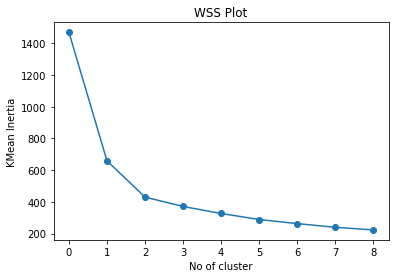

In [29]:
plt.plot(wss,marker='o')
plt.ylabel('KMean Inertia')
plt.xlabel('No of cluster')
plt.title('WSS Plot')

In [30]:
# taking the best cluster using the Elbow plot or WSS Plot

kmean=KMeans(n_clusters=3,random_state=0)
kmean=kmean.fit(dfs)
labels=kmean.labels_
labels

array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0])

In [31]:
# After finializing the no of clusters we are making kmean in the column

data_df['Kmean']=kmean.labels_

In [32]:
data_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster,Kmean
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,2
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2,0
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,2
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2,1
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,2


In [41]:
data_df.to_csv("clustring_analysis_output.csv")

In [33]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [34]:
silhouette_score(dfs,labels)

# this is the silhoutte score for n_cluster 3 , we can do for all silhoutte scores and find the best score.

0.4008059221522216

In [35]:
# Plotting silhouette score
sil=[]
for i in range(2,10):
    kmean=KMeans(n_clusters=i,random_state=0)
    labels=kmean.fit_predict(dfs)
    silhouette_value=silhouette_score(dfs,labels)
    sil.append(silhouette_value)

In [36]:
sil

[0.46560100442748986,
 0.4008059221522216,
 0.33299718819052243,
 0.28341224092965217,
 0.2904176989898476,
 0.26771376419156007,
 0.26658858010818204,
 0.25556173620587375]

For n_clusters = 2 The average silhouette_score is : 0.46560100442748986
For n_clusters = 3 The average silhouette_score is : 0.4008059221522216
For n_clusters = 4 The average silhouette_score is : 0.3305923756409799
For n_clusters = 5 The average silhouette_score is : 0.2857552367532611
For n_clusters = 6 The average silhouette_score is : 0.28813054890434964


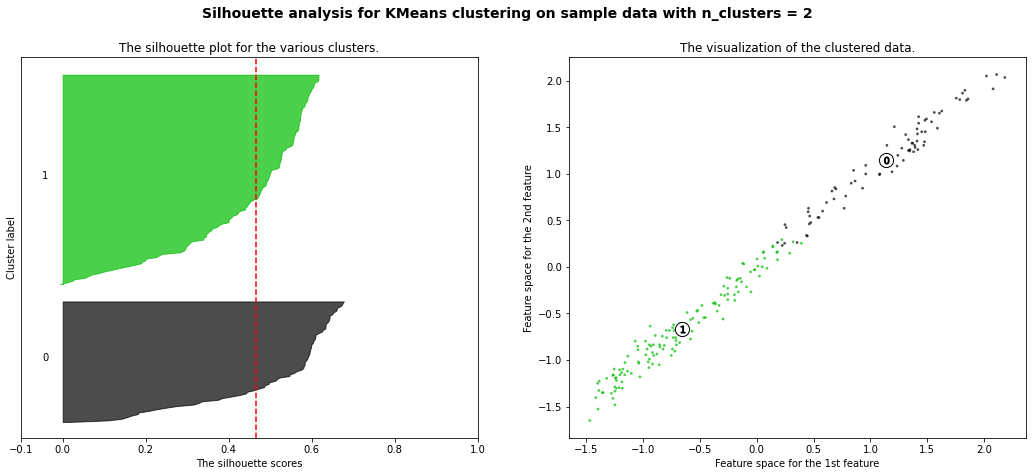

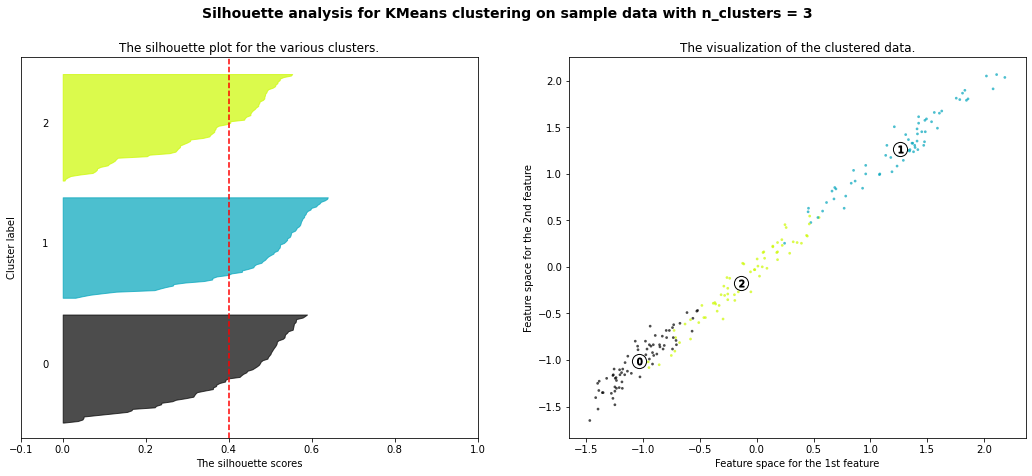

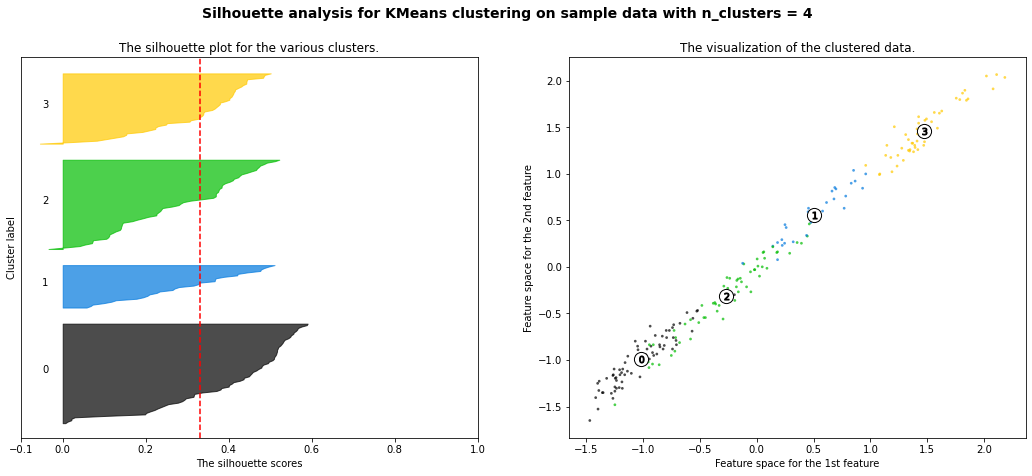

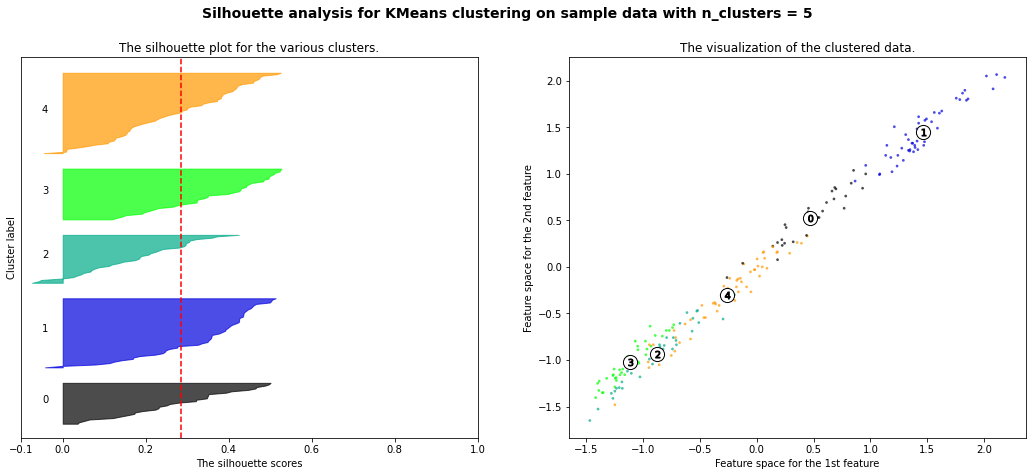

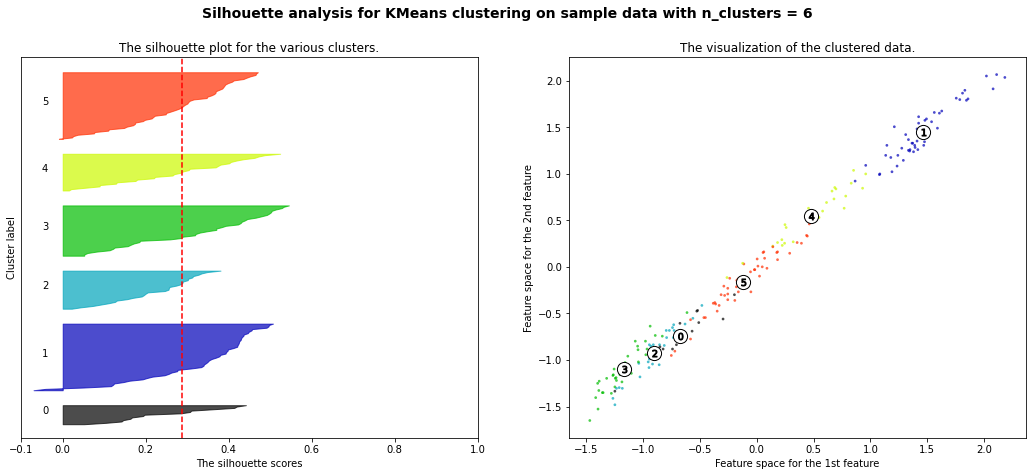

In [37]:
import matplotlib.cm as cm
dummy_clusters = [2, 3, 4, 5, 6]

for k in dummy_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (k+1)*10 is for inserting space between silhouette plots of individual clusters,to specify the limits clearly.
    ax1.set_ylim([0, len(dfs) + (k + 1) * 10])

    # Initialize the clusterer
    
    clusterer = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusterer.fit_predict(dfs)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(dfs, cluster_labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dfs, cluster_labels)

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette scores")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / k)
    ax2.scatter(dfs[:, 0], dfs[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % k),
                 fontsize=14, fontweight='bold')

plt.show()

In [38]:
sil_width = silhouette_samples(dfs,labels)
data_df["sil_width"] = sil_width
data_df.head(5)
data_df.drop('cluster',axis=1).head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Kmean,sil_width
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,2,0.371638
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,0,0.189118
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,2,0.041874
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,1,0.583507
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,2,0.495193


In [39]:
print('The number of datapoints less than zero silhoutte width is :',(data_df['sil_width']<0).sum())
print('The number of datapoints greater than zero silhoutte width is :',(data_df['sil_width']>0).sum())

The number of datapoints less than zero silhoutte width is : 15
The number of datapoints greater than zero silhoutte width is : 195


## 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [40]:
avg=data_df.groupby(data_df['Kmean']).mean()
avg

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster,sil_width
Kmean,,,,,,,,,
0,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,1.943662,0.200089
1,11.856944,13.247778,0.848330,5.231750,2.849542,4.733892,5.101722,2.000000,0.272873
2,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,1.014925,0.295744


The cluster 0 is 'MIDDLE CLASS' people has low credit limit of 28500 rupees and they are classified as 'GOLD card holders', these customers has average spending amount 11.850.These customers are paying the minimum payment and they are 
maintaining low current balance, high minimum payment amount and their credit amount in advance payments is less

So for Cluster 0 : We can give Promotional statergies like 'FREE COUPONS','EXTRA REWARD POINTS' to increase their spending amount. 

The cluster 1 is 'UPPER MIDDLE CLASS' people has average credit limit of 32500 rupees : they are classified as 'DIAMOND card holders', these customers has average spending amount 14.437.These customers are giving income to the bank by collecting the interest from them and they are maintaining moderate current balance less amount on minimum payment and their credit amount in advance payments is moderate.

So for Cluster 1 : We can give Promotional statergies like 'LOW INTEREST RATE','EXTRA CASHBACK' to increase their minimum payment amount. 


The cluster 2 is 'HIGH ClASS' people has more credit limit of 37000 rupees : they are classified as 'PLATINUM card holders', these customers has average spending amount 18.495.These customers are called max payers because they are doing advance payments,maintaining high current balance and their spending amount is also more.

So for Cluster 2 : We can give Promotional statergies like 'INCREASE CREDIT LIMIT','SPECIAL CREDIT CARDS','LOW INTEREST LOANS' to reduce their advance/full payment. 
